<a href="https://colab.research.google.com/github/ehcdc1967/PROYECTO_INVERSION/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
detalle = pd.read_parquet('/content/drive/MyDrive/TESIS/MEF_PORTAL_DE_DATOS_ABIERTOS/Data_parquet/detalle.parquet')
df = pd.read_parquet('/content/drive/MyDrive/TESIS/MEF_PORTAL_DE_DATOS_ABIERTOS/Data_parquet/poblacion.parquet')

In [ ]:
df

,CODIGO_UNICO,FUNCION,SOBRECOSTO,TIEMPO_VIABILIDAD,TIEMPO_EJECUCION,BENEFICIARIO,CTRL_CONCURR,MONTO_LAUDO,MONTO_FIANZA,NATURALEZA_MEJORAMIENTO,...,NATURALEZA_TOTAL,MODALIDAD_DIRECTA,MODALIDAD_INDIRECTA,MODIFICACION_F8,EXPEDIENTE_TECNICO,REGISTRADO_PMI,DPTO,TIPO_MUNICIPALIDAD,RATIO_ET_VIABLE,RATIO_ET_COSTO
0,2568264,CULTURA Y DEPORTE,1.0,5.0,89.0,434.0,0.00,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,HUANCAVELICA,G,1.040114,1.022229
1,2546805,"PLANEAMIENTO, GESTIÓN Y RESERVA DE CONTINGENCIA",1.0,1.0,91.0,678.0,0.00,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,AYACUCHO,E,1.670448,0.796145
2,2602787,"PLANEAMIENTO, GESTIÓN Y RESERVA DE CONTINGENCIA",0.0,5.0,61.0,2530.0,0.00,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,SAN MARTIN,F,0.715191,1.000000
3,2548718,TRANSPORTE,1.0,6.0,61.0,720.0,0.00,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,ICA,E,1.000000,0.990071
4,2568329,TRANSPORTE,0.0,0.0,92.0,208800.0,0.00,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,LORETO,F,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50706,2634216,TRANSPORTE,0.0,85.0,92.0,2924.0,0.00,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,LIMA,C,0.000000,0.000000
50707,2643439,SALUD,0.0,0.0,92.0,379.0,0.00,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,ANCASH,G,0.000000,0.000000
50708,2645909,EDUCACIÓN,0.0,2.0,365.0,2034.0,0.00,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,CAJAMARCA,G,0.000000,0.000000
50709,2649000,VIVIENDA Y DESARROLLO URBANO,0.0,4.0,31.0,641.0,0.00,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,LIMA,E,0.000000,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50711 entries, 0 to 50710
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CODIGO_UNICO             50711 non-null  object  
 1   FUNCION                  50711 non-null  object  
 2   SOBRECOSTO               50711 non-null  float64 
 3   TIEMPO_VIABILIDAD        50711 non-null  float64 
 4   TIEMPO_EJECUCION         50711 non-null  float64 
 5   BENEFICIARIO             50711 non-null  float64 
 6   CTRL_CONCURR             50711 non-null  float64 
 7   MONTO_LAUDO              50711 non-null  float64 
 8   MONTO_FIANZA             50711 non-null  float64 
 9   NATURALEZA_MEJORAMIENTO  50711 non-null  float64 
 10  NATURALEZA_AMPLIACION    50711 non-null  float64 
 11  NATURALEZA_RECUPERACION  50711 non-null  float64 
 12  NATURALEZA_CREACION      50711 non-null  float64 
 13  NATURALEZA_TOTAL         50711 non-null  float64 
 14  MODALI

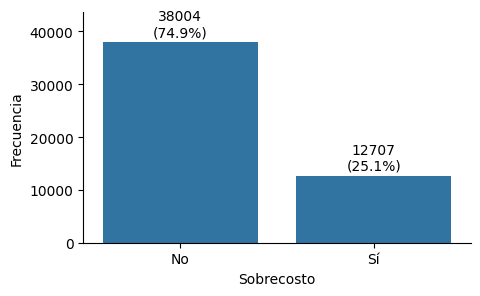

In [ ]:
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt

df['SOBRECOSTO_LABEL'] = df['SOBRECOSTO'].map({0: 'No', 1: 'Sí'})
plt.figure(figsize=(5,3))
ax = sns.countplot(x='SOBRECOSTO_LABEL', data=df, order=['No', 'Sí'])
plt.xlabel('Sobrecosto')
plt.ylabel('Frecuencia')

for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{count / len(df) * 100:.1f}%'
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height() + 500),
                ha='center', va='bottom', fontsize=10)
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)  # Ajustar límite superior del eje Y
sns.despine()  # Eliminar bordes del gráfico
plt.show()

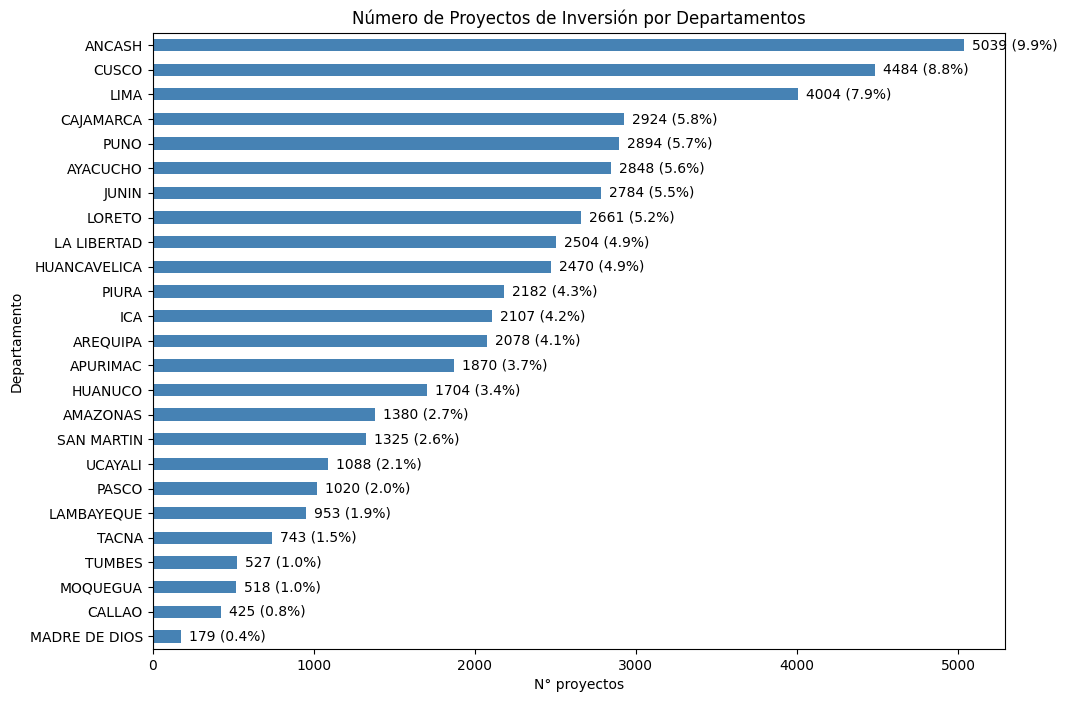

In [ ]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de la variable 'DPTO'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['DPTO'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(11, 8))
ax = dpto_freq.plot(kind='barh', color='steelblue')
plt.title('Número de Proyectos de Inversión por Departamentos')
plt.xlabel('N° proyectos')
plt.ylabel('Departamento')
plt.gca().invert_yaxis()  # Invertir el eje Y

# Agregar etiquetas con frecuencia y porcentaje
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center')

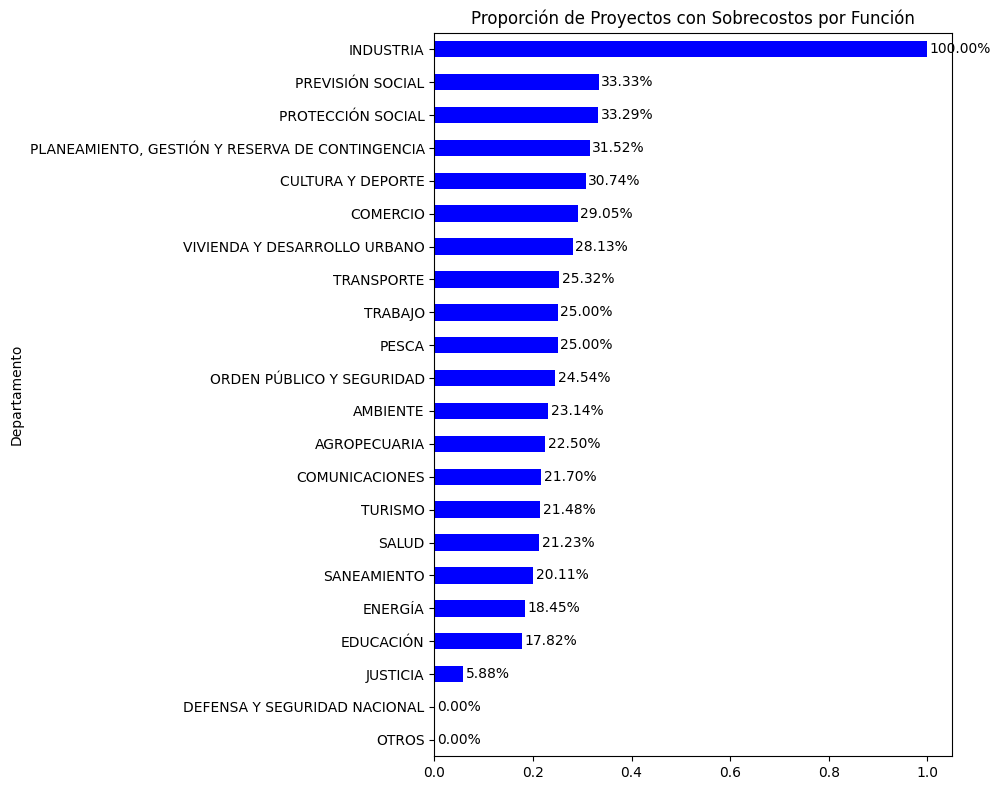

In [ ]:
import matplotlib.pyplot as plt
# Group data by department (DPTO) and calculate the proportion of projects with cost overruns
department_sobrecosto = df.groupby('FUNCION')['SOBRECOSTO'].mean()
# Sort by the proportion of projects with cost overruns
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot the data
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='blue')
plt.title('Proporción de Proyectos con Sobrecostos por Función')
#plt.xlabel('Proporción de Proyectos con Sobrecostos')
plt.ylabel('Departamento')
# Add percentage values on the bars
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

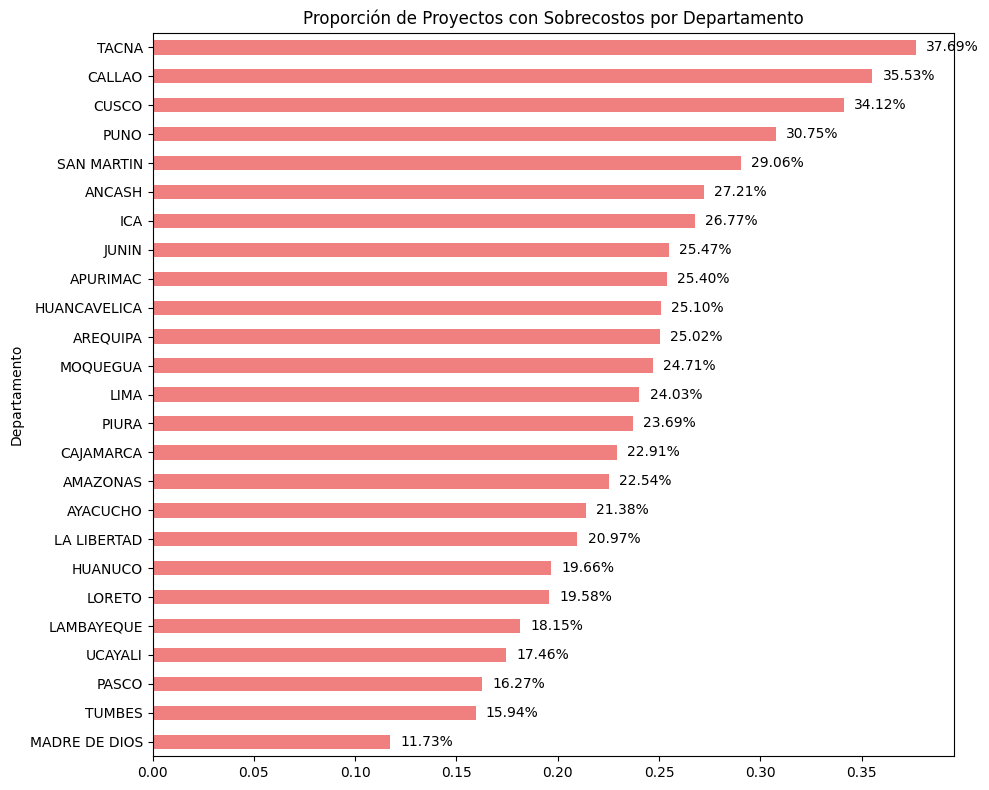

In [ ]:
import matplotlib.pyplot as plt
department_sobrecosto = df.groupby('DPTO')['SOBRECOSTO'].mean()
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Proporción de Proyectos con Sobrecostos por Departamento')
plt.ylabel('Departamento')
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

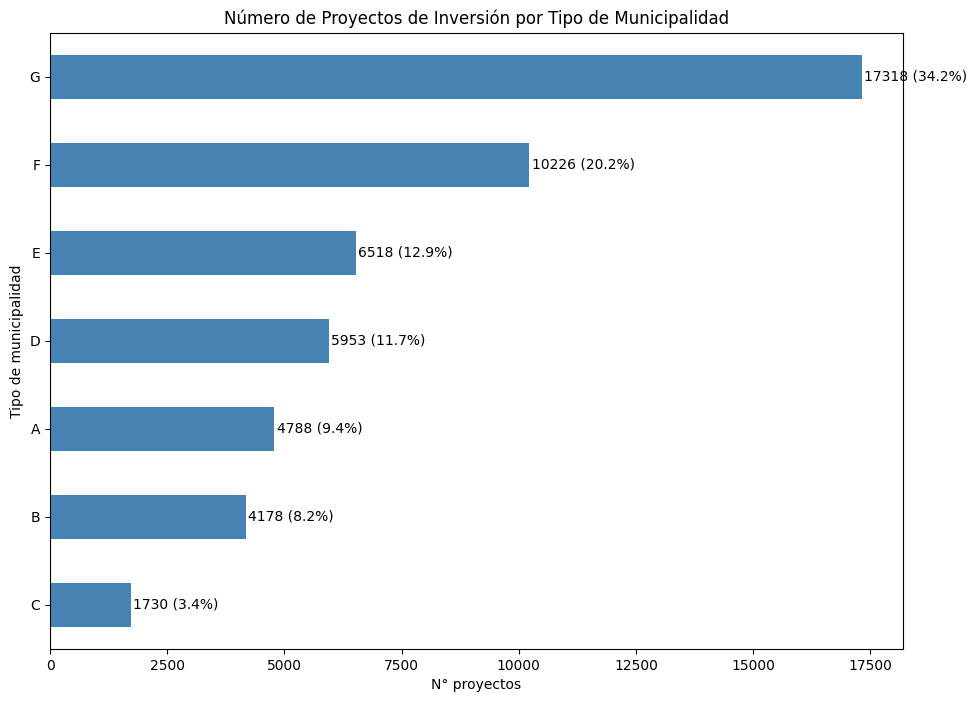

In [ ]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de la variable 'DPTO'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['TIPO_MUNICIPALIDAD'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(11, 8))
ax = dpto_freq.plot(kind='barh', color='steelblue')
plt.title('Número de Proyectos de Inversión por Tipo de Municipalidad')
plt.xlabel('N° proyectos')
plt.ylabel('Tipo de municipalidad')
plt.gca().invert_yaxis()  # Invertir el eje Y

# Agregar etiquetas con frecuencia y porcentaje
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center')



<ipython-input-30-02a1e0bbe4d8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  department_sobrecosto = df.groupby('TIPO_MUNICIPALIDAD')['SOBRECOSTO'].mean()


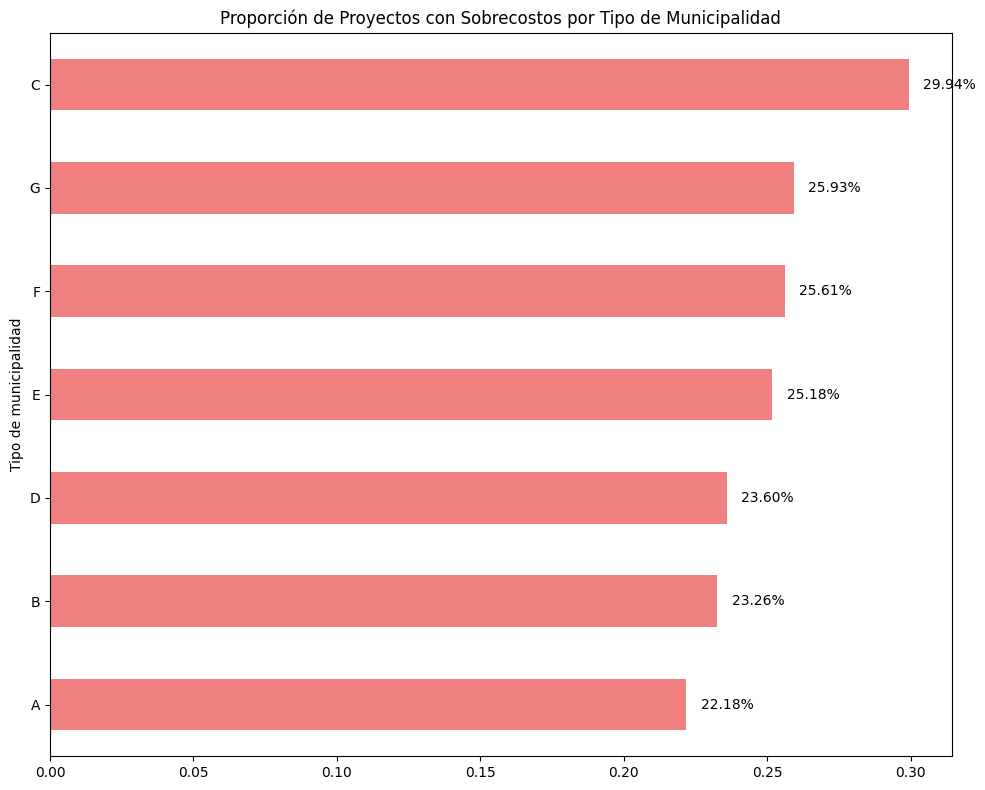

In [ ]:
import matplotlib.pyplot as plt
department_sobrecosto = df.groupby('TIPO_MUNICIPALIDAD')['SOBRECOSTO'].mean()
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Proporción de Proyectos con Sobrecostos por Tipo de Municipalidad')
plt.ylabel('Tipo de municipalidad')
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

<ipython-input-41-66f2a3783a68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=detalle, x='DEPARTAMENTO', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")


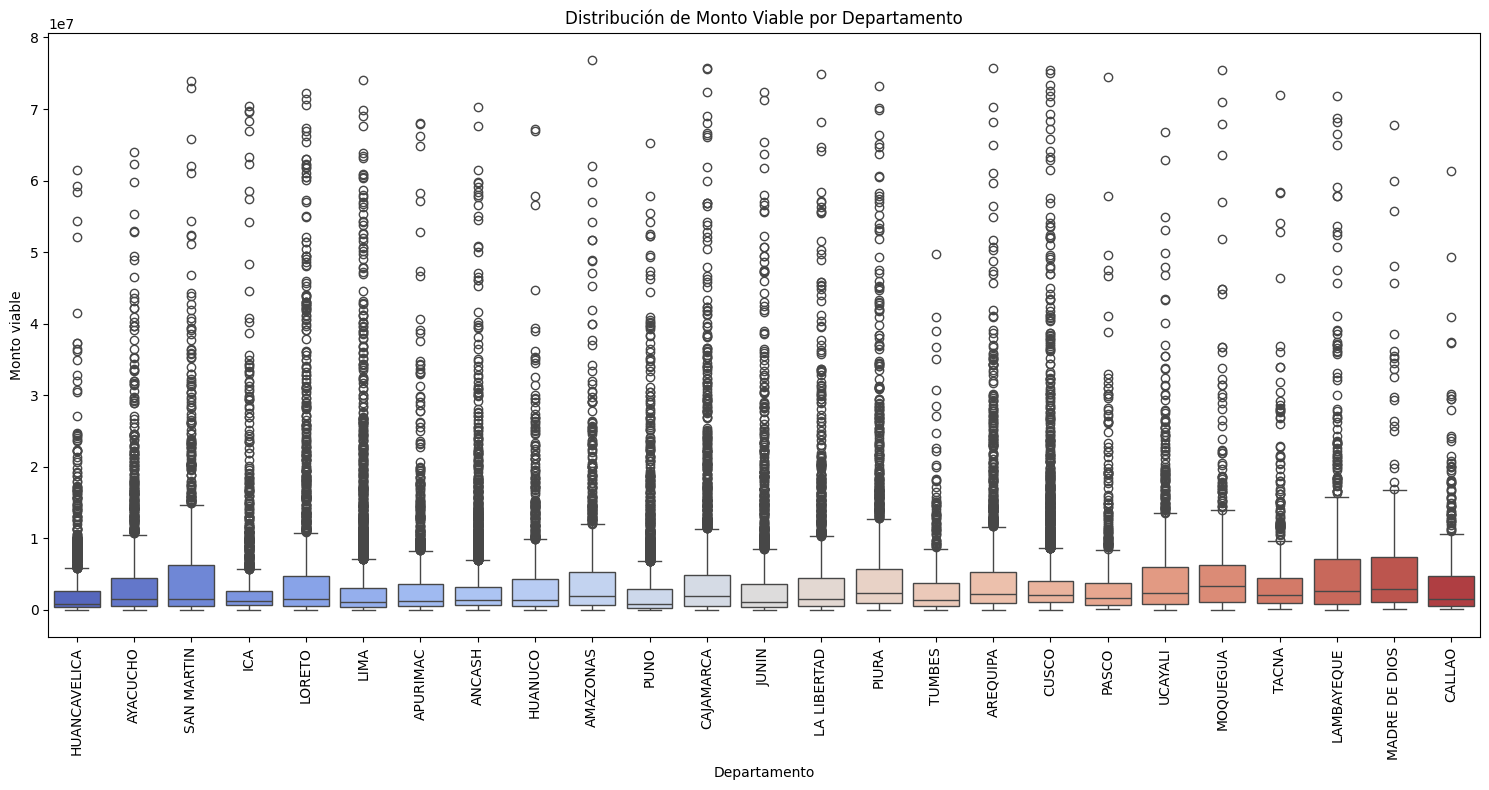

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='DEPARTAMENTO', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

<ipython-input-40-59a6d7bf90ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")


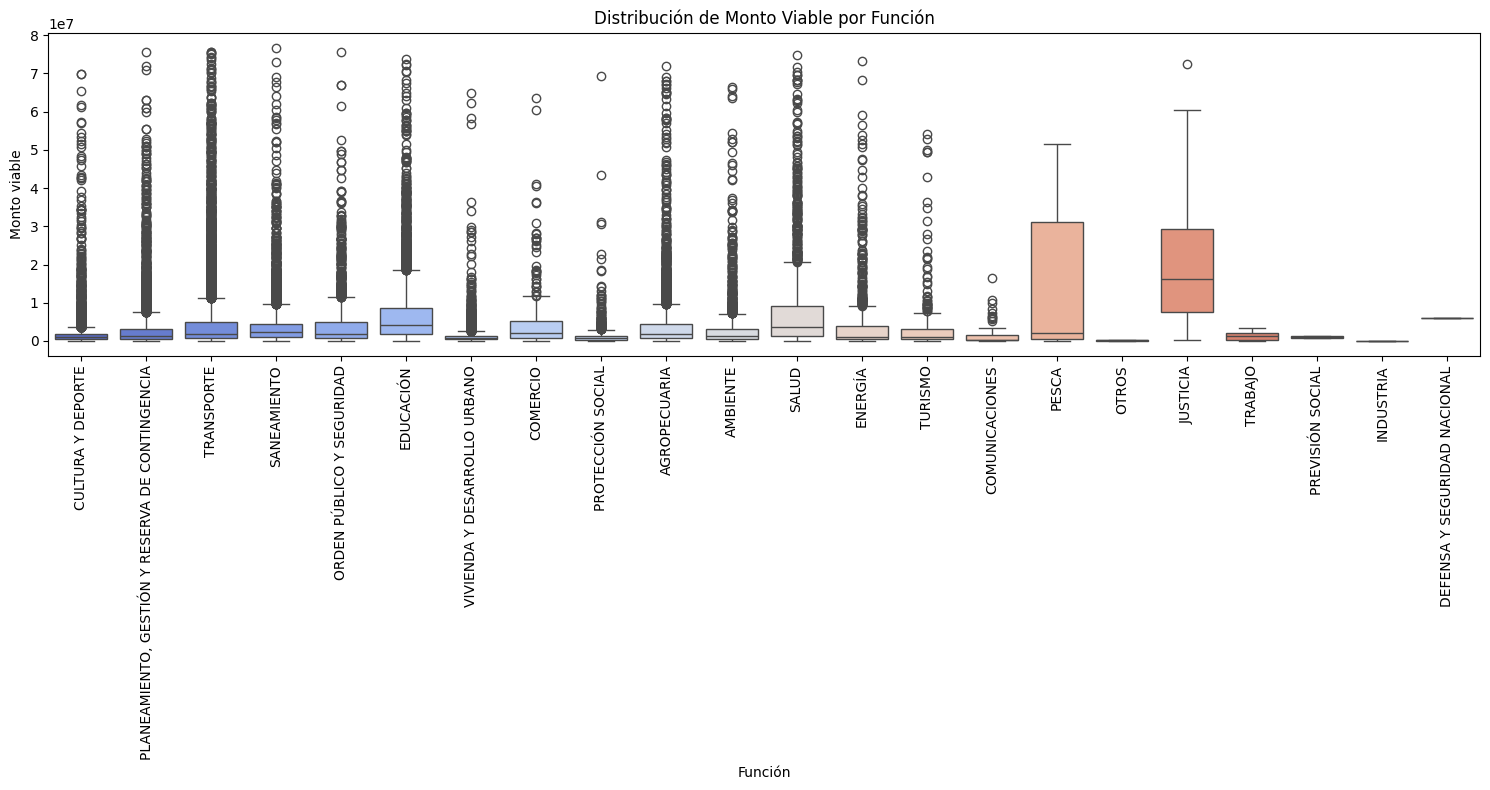

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Función')
plt.xlabel('Función')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

In [ ]:
detalle.shape


(50711, 103)